# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [2]:
hdu = fits.open('/Users/megankokoris1/Desktop/ccd/flat29.5.FIT')
header = hdu[0].header
print(header['exposure'])

29.5


## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [3]:
# This is equivalent to $ ls Flat*.fits
#flat_list = glob.glob('/Users/megankokoris1/Desktop/ccd/flat/flat*.FIT')
flat_list = glob.glob('/Users/megankokoris1/Desktop/ccd/Xavier/*.FIT')
print(flat_list)

['/Users/megankokoris1/Desktop/ccd/Xavier/12_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/15_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/18_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/18_sec2.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/24_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/30_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/36_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/3_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/42_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/48_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/54_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/60_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/6_sec.FIT', '/Users/megankokoris1/Desktop/ccd/Xavier/80_sec.FIT']


Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [4]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 12.0 sec
Mean counts: 18178.72

Exposure time 15.0 sec
Mean counts: 23983.32

Exposure time 18.0 sec
Mean counts: 28975.72

Exposure time 18.0 sec
Mean counts: 26611.05

Exposure time 24.0 sec
Mean counts: 36629.32

Exposure time 30.0 sec
Mean counts: 45259.31

Exposure time 36.0 sec
Mean counts: 52164.65

Exposure time 3.0 sec
Mean counts: 5353.18

Exposure time 42.0 sec
Mean counts: 56429.01

Exposure time 48.0 sec
Mean counts: 57330.16

Exposure time 54.0 sec
Mean counts: 57626.20

Exposure time 60.0 sec
Mean counts: 57723.53

Exposure time 6.0 sec
Mean counts: 9578.54

Exposure time 80.0 sec
Mean counts: 57786.30



## Plot mean counts versus exposure time


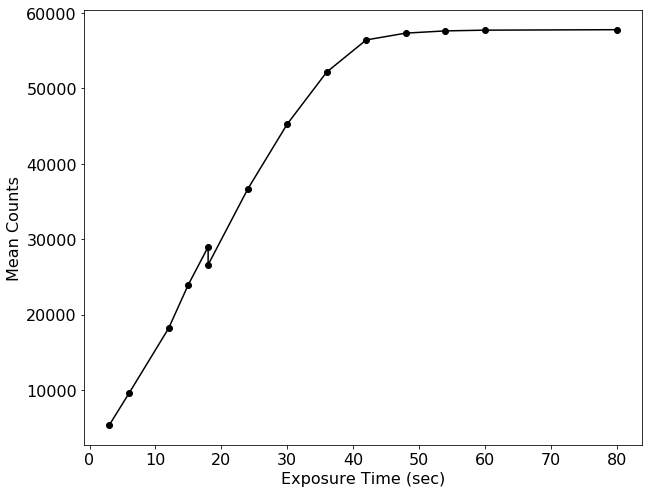

In [27]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean Counts')
plt.show()